In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import collections
import pandas as pd

from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


## 1. Prepare dataset

In [2]:
%run create_dataset_hologram.py

----- Loading hologram dataset... -----
Hologram dataset loaded (matlab file dictionary)
Hologram dataset shape:  (200, 200, 1500)
Total number of holograms: 1500
Number of holograms per class: 300
Hologram dataset saved in .npy file!

----- Data pre-procesing... -----
Reshaping dataset to 1 dimension...
Dataset 1D shape:  (1500, 40000)
Normalizing dataset...
Normalized dataset shape:  (1500, 40000)
Computing Y_array...
Y_array shape:  (1500,)
Counter({0.0: 300, 1.0: 300, 2.0: 300, 3.0: 300, 4.0: 300})
Y_array saved in a .npy file!

----- Spliting dataset... -----
Trainset: 80.0%, testset: 20.0 %
Data :  (1500, 40000) (1500,)
Train:  (1200, 40000) (1200,)
Test :  (300, 40000) (300,)
X_train, Y_train, X_test, Y_test saved in .npy files!

Done!
Execution time: 15.4556 seconds


In [2]:
# Load the dataset
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')

X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

print('Train: ', X_train.shape, Y_train.shape)
print('Test : ', X_test.shape, Y_test.shape)

Train:  (1200, 40000) (1200,)
Test :  (300, 40000) (300,)


## 2. Neural network

In [3]:
# Create the model
model = Sequential() # build a model layer by layer

# Add model layers

# First layer (input layer)
nb_nodes1 = 12
input_dim1 = 8 
activation1 = 'relu' # Rectified linear unit (ReLU)

model.add(Dense(nb_nodes1, input_dim=input_dim1, activation=activation1))

# Second layer (hidden layer)
nb_nodes2 = 8
activation2 = 'relu' # Rectified linear unit (ReLU)

model.add(Dense(nb_nodes2, activation=activation2))

# Third layer (output layer)
nb_nodes3 = 1
activation3 = 'sigmoid' # Sigmoid, ensures the newtowork output between 0 and 1

model.add(Dense(nb_nodes3, activation=activation3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
# loss_fct = 'categorical_crossentropy' # Used for classification problem
loss_fct = 'binary_crossentropy'
opt_fct = 'adam' # Popular version of Gradient Descent
metrics_fct = ['accuracy'] # Classification problem

model.compile(loss=loss_fct, optimizer=opt_fct, metrics=metrics_fct)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
nb_epochs = 150
nb_batchs = 10

In [6]:
history = model.fit(X, y, epochs=nb_epochs, batch_size=nb_batchs)


Epoch 1/150
768/768 [==============================] - 0s 260us/step - loss: 8.3951 - accuracy: 0.4648
Epoch 2/150
768/768 [==============================] - 0s 92us/step - loss: 1.4783 - accuracy: 0.5990
Epoch 3/150
768/768 [==============================] - 0s 92us/step - loss: 1.1595 - accuracy: 0.6081
Epoch 4/150
768/768 [==============================] - 0s 91us/step - loss: 1.0181 - accuracy: 0.6146
Epoch 5/150
768/768 [==============================] - 0s 89us/step - loss: 0.8898 - accuracy: 0.6055
Epoch 6/150
768/768 [==============================] - 0s 86us/step - loss: 0.7953 - accuracy: 0.6445
Epoch 7/150
768/768 [==============================] - 0s 86us/step - loss: 0.7409 - accuracy: 0.6758
Epoch 8/150
768/768 [==============================] - 0s 85us/step - loss: 0.7065 - accuracy: 0.6562
Epoch 9/150
768/768 [==============================] - 0s 83us/step - loss: 0.6729 - accuracy: 0.6836
Epoch 10/150
768/768 [==============================] - 0s 87us/step - loss: 0.6

In [7]:
# Summarize model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


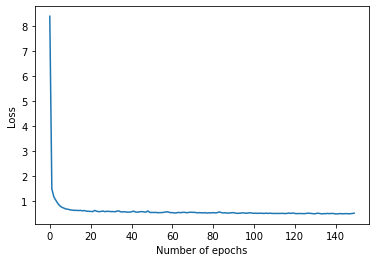

In [8]:
plt.plot(history.history['loss'], label = 'train')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

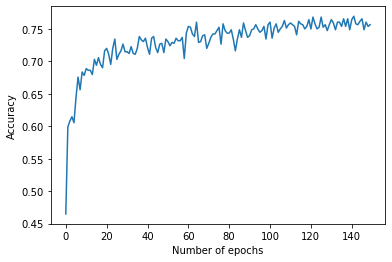

In [9]:
plt.plot(history.history['accuracy'], label = 'train')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [2]:
# load the dataset
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
print(X.shape)
print(y.shape)

(768, 8)
(768,)


Reshaped dataset input

In [ ]:
# Reshape the dataset input to the shape that our model expects
# The first number is the number of images, then comes the shape of each image
# The last number is 1, which signifies that the images are greyscale

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('Train: ', X_train.shape)
print('Test : ', X_test.shape)

'One-hot-encode' the target variable


In [ ]:
# One-hot encode target column: create a column for each category and a binary 
# variable is inputted for each category
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('Train: ', Y_train.shape)
print(Y_train)
print('Test : ', Y_test.shape)

**Building the model**

In [ ]:
# Create model
model = Sequential() # build a model layer by layer

In [ ]:
# Number of nodes in the first and second layer
nb_nodes_1 = 64
nb_nodes_2 = 32

# Kernel size
k_size = 3

In [ ]:
# Add model layers

# Conv2D layer: 
# 64 nodes, 3x3 filter matrix, Rectified Linear Activation as activation function,
# shape of each input (200, 200, 1,) with 1 signifying images are greyscale
model.add(Conv2D(nb_nodes_1, kernel_size = k_size, activation = 'relu', input_shape = (40000, 1)))

# 32 nodes
model.add(Conv2D(nb_nodes_2, kernel_size = k_size, activation = 'relu'))

# Flatten layer: connection between the convolution and dense layers
model.add(Flatten())

# Dense layer: used for the output layer
# 5 nodes for the output layer, one for each possible outcome (1-5)
# 'softmax' as activation function, it makes the output sump up to 1 so the output
# can be interpreted as probalities
model.add(Dense(nb_class, activation = 'softmax'))

**Compiling the model**

In [ ]:
# Three parameters:
# optmizer: 'adam'
# loss function: 'categorical_crossentropy', the most common choice for classification
# metrics: 'accuracy', to see the accuracy score
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Number of times that the learning algorihm will work through the entire training set
nb_epochs = 10

# Number of samples to work through before updating the interval model parameters
nb_batch = 1

**Training the model**

In [ ]:
%%time

# Number of epochs: number of tmes the model wil cycle trough the data
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = nb_epochs)